In [2]:
import mne
import pandas as pd
import numpy as np 
import re
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
#brainvision file
vhdr_fname='/home/vitaly/anaconda2/vit/Scripts/mne/data/eeg_data_13/R013_block1.vhdr'
data=mne.io.read_raw_brainvision(vhdr_fname,preload=True)
#adding sensor info 
montage = mne.channels.read_montage('standard_1020')
data.set_montage(montage)



Extracting parameters from /home/vitaly/anaconda2/vit/Scripts/mne/data/eeg_data_13/R013_block1.vhdr...
Online software filter detected. Using software filter settings and ignoring hardware values
Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
Channels contain different lowpass filters. Highest (weakest) filter setting (499.00 Hz) will be stored.
Setting channel info structure...
Reading 0 ... 681139  =      0.000 ...   681.139 secs...
The following EEG sensors did not have a position specified in the selected montage: [u'Empty1', u'NOSE', u'VEOG', u'HEOG', u'ECG', u'Empty2', u'EMG_COR', u'EMG_ZYG', u'RESP', u'SCR']. Their position has been left untouched.


In [4]:
data.drop_channels(['Empty1','Empty2'])

<RawBrainVision  |  R013_block1.eeg, n_channels x n_times : 71 x 681140 (681.1 sec), ~369.1 MB, data loaded>

In [5]:
# set channel types
data.set_channel_types({'NOSE':'misc'})
data.set_channel_types({'EMG_COR':'misc'})
data.set_channel_types({'EMG_ZYG':'misc'})
data.set_channel_types({'SCR':'misc'})

data.set_channel_types({'VEOG':'eog'})
data.set_channel_types({'HEOG':'eog'})
data.set_channel_types({'RESP':'resp'})
data.set_channel_types({'ECG':'ecg'})

The unit for channel RESP has changed from V to NA.


In [7]:

vmrk_file=vhdr_fname[:-4]+'vmrk'
events = pd.read_csv(vmrk_file,sep=',',skiprows=11)
events=events.iloc[:,1:4]
ev=events.iloc[:,0].values
pattern=u'\d'
ev1=np.array(map(lambda x: int(re.findall(pattern,ev[x])[0]),range(len(ev))))
ev2=np.array(events.iloc[:,1])
ev3=np.array(events.iloc[:,2])
dat={'col1':ev2,'col2':ev3,'col3':ev1}
events=pd.DataFrame(dat).values


data, _ = mne.io.set_eeg_reference(data)


data.filter(1,40) 

Adding average EEG reference projection.
1 projection items deactivated
Band-pass filtering from 1 - 40 Hz
Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
lower transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
upper transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
The default filter length in 0.13 is "10s" but will change to "auto" in 0.14


<ipython-input-7-4e9943f9a2f9>:17: DeprecationWarning: Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
lower transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
upper transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
The default filter length in 0.13 is "10s" but will change to "auto" in 0.14
  data.filter(1,40)


<RawBrainVision  |  R013_block1.eeg, n_channels x n_times : 71 x 681140 (681.1 sec), ~369.1 MB, data loaded>

EEG = pop_select( EEG,'nochannel',{'Empty1' 'Empty2' 'RESP'});<br>
EEG = eeg_checkset( EEG );<br>
pop_eegplot( EEG, 1, 1, 1);<br>
EEG = pop_select( EEG,'nochannel',{'SCR'});<br>
EEG = eeg_checkset( EEG );<br>
pop_eegplot( EEG, 1, 1, 1);<br>
pop_eegplot( EEG, 1, 1, 1);<br>
EEG = pop_select( EEG,'nochannel',{'EMG_COR'});

In [8]:
# delete some channels
list_bad_channels=['NOSE','VEOG','HEOG','STI 014']
                  
data.drop_channels(list_bad_channels)

<RawBrainVision  |  R013_block1.eeg, n_channels x n_times : 67 x 681140 (681.1 sec), ~348.3 MB, data loaded>

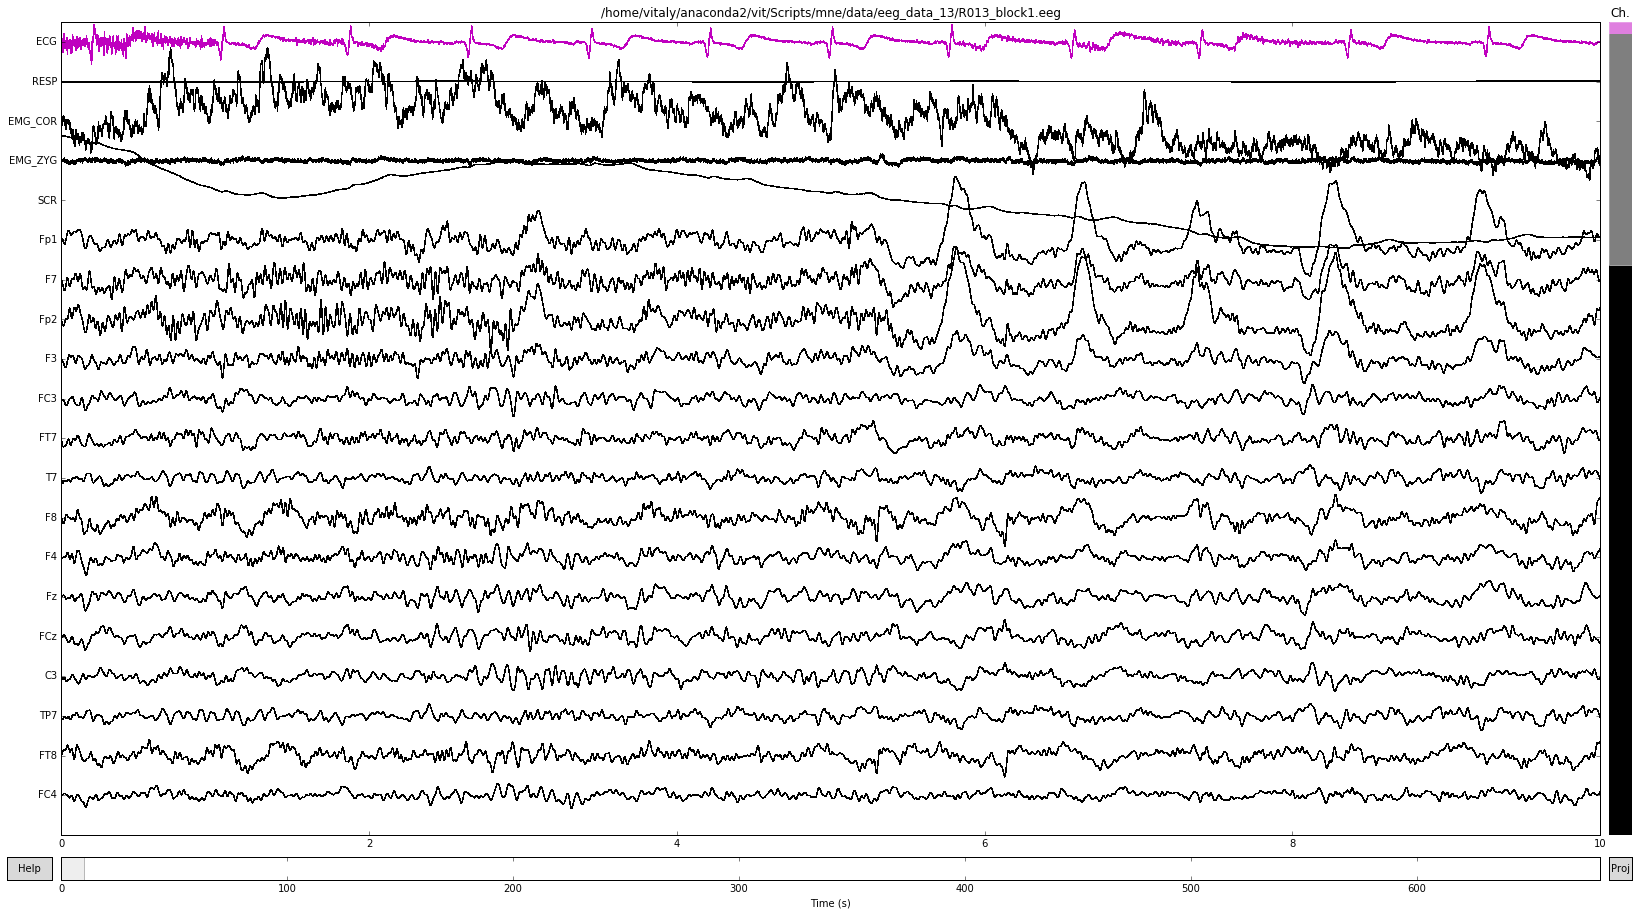

In [16]:
data.plot()
plt.show()

In [9]:
data, _ = mne.io.set_eeg_reference(data)


An average reference projection was already added. The data has been left untouched.


In [10]:
epochs = mne.Epochs(data,events, tmin=-1, tmax=2,
                    baseline=(-1, -0.5), preload=True, add_eeg_ref=False)
print(epochs)



40 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 40 events and 3001 original time points ...
0 bad epochs dropped
<Epochs  |  n_events : 40 (all good), tmin : -1.0 (s), tmax : 2.0 (s), baseline : (-1, -0.5), ~61.5 MB, data loaded,
 '1': 8, '3': 8, '5': 8, '7': 8, '9': 8>


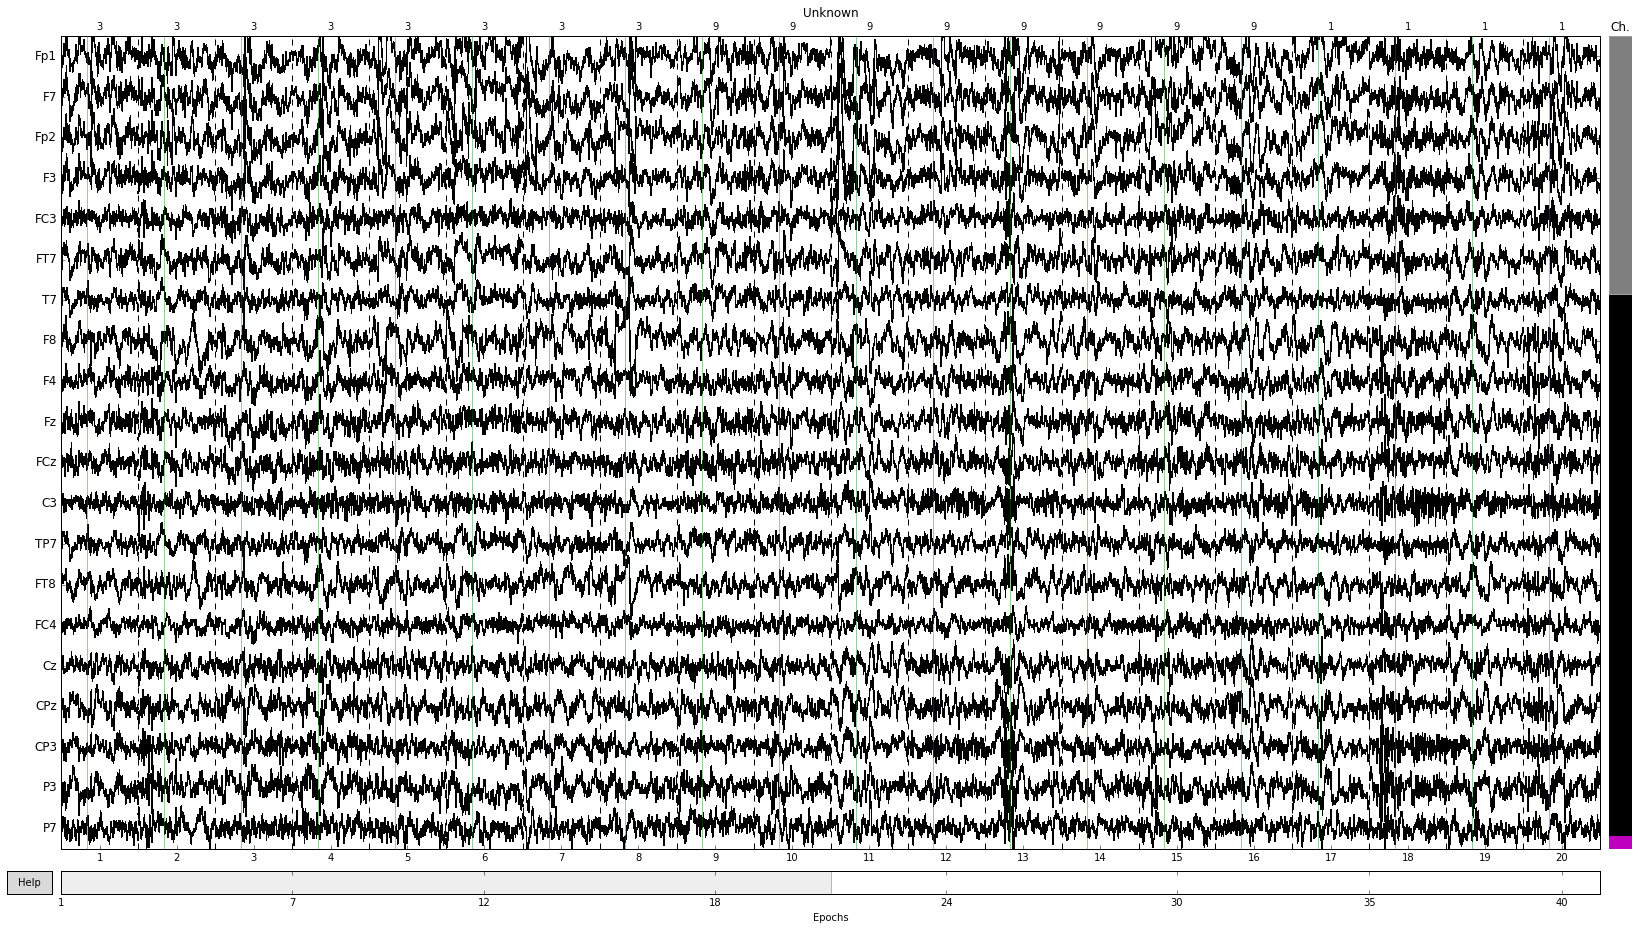

In [19]:
epochs.plot()
plt.show()

In [11]:
#delete epoch 35
epochs.drop([35])

Dropped 1 epoch


<Epochs  |  n_events : 39 (all good), tmin : -1.0 (s), tmax : 2.0 (s), baseline : (-1, -0.5), ~60.0 MB, data loaded,
 '1': 8, '3': 8, '5': 8, '7': 7, '9': 8>

In [15]:
from mne.preprocessing import ICA
ica =  ICA(n_components=61, n_pca_components=None, max_pca_components=None,
          noise_cov=None, random_state=0, method='fastica')
print(ica)


<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>


In [16]:
ica.fit(epochs)

Fitting ICA to data using 62 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by number: 61 components


<ICA  |  epochs decomposition, fit (fastica): 117039 samples, 61 components, channels used: "eeg">

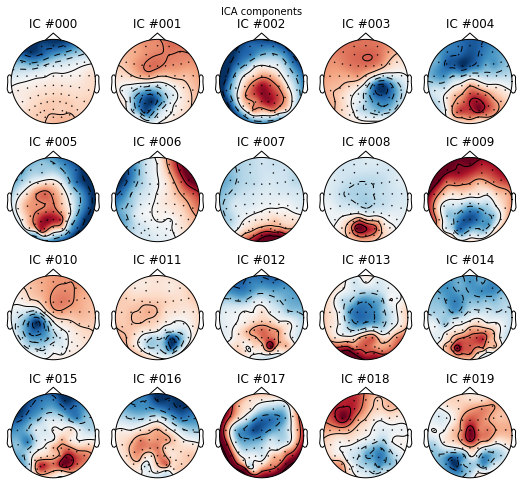

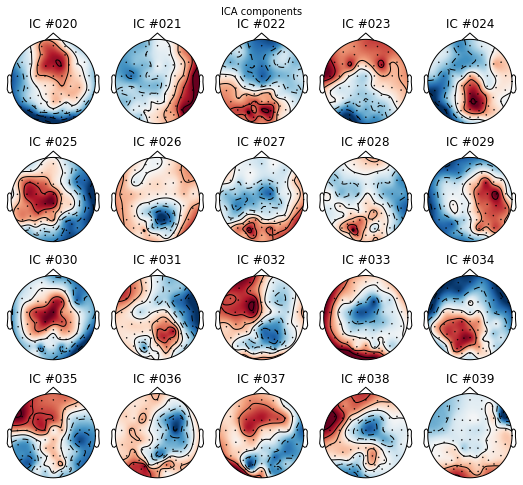

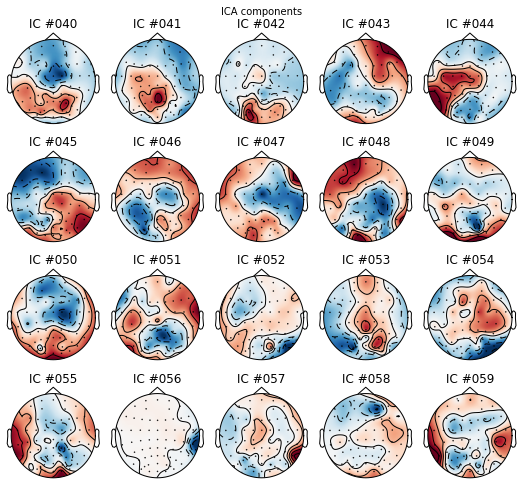

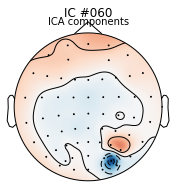

In [18]:
%matplotlib inline
ica.plot_components()
plt.show()

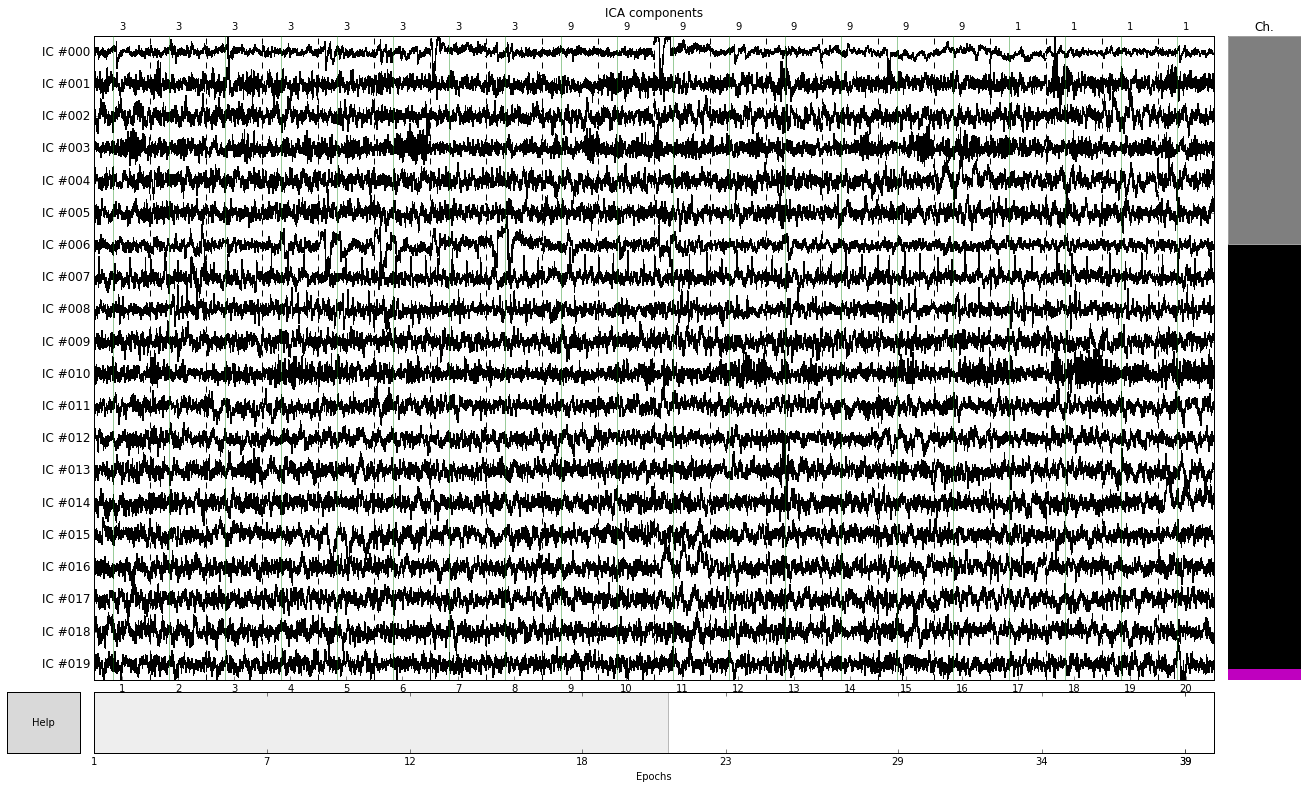

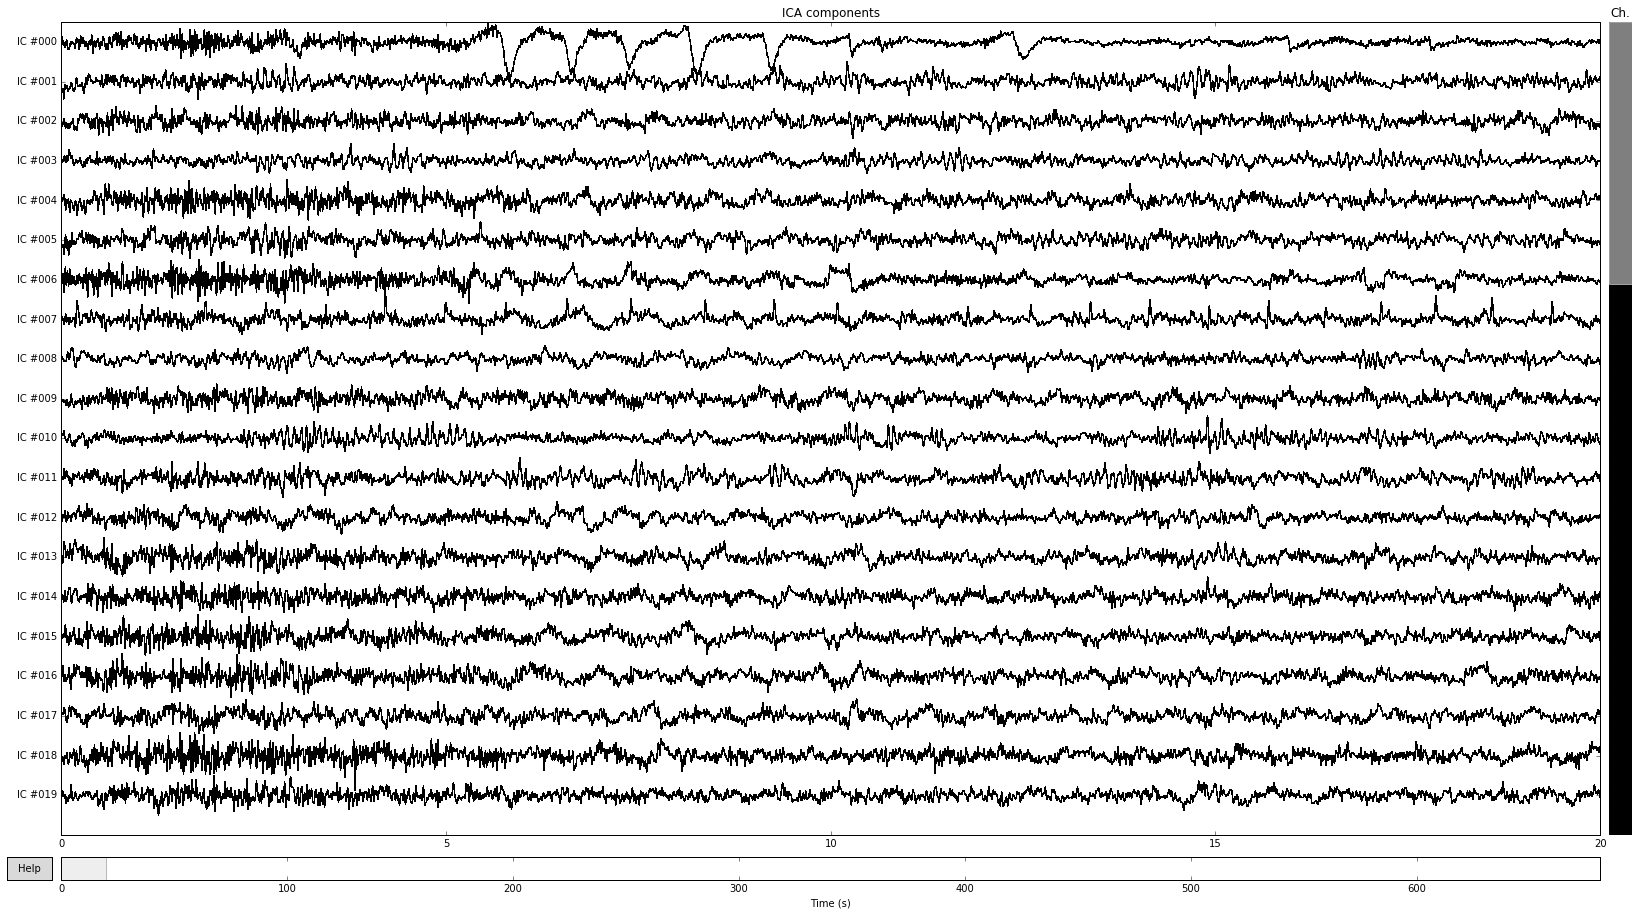

In [19]:

ica.plot_sources(epochs)
plt.figure()
ica.plot_sources(data)
plt.show()

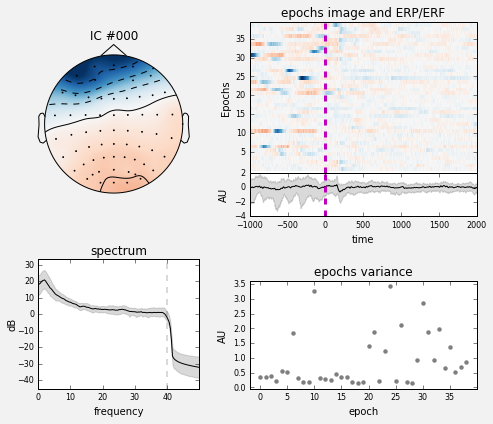

In [20]:
ica.plot_properties(epochs, picks=0)
plt.show()


In [21]:
ica.exclude.extend([0,1,2])

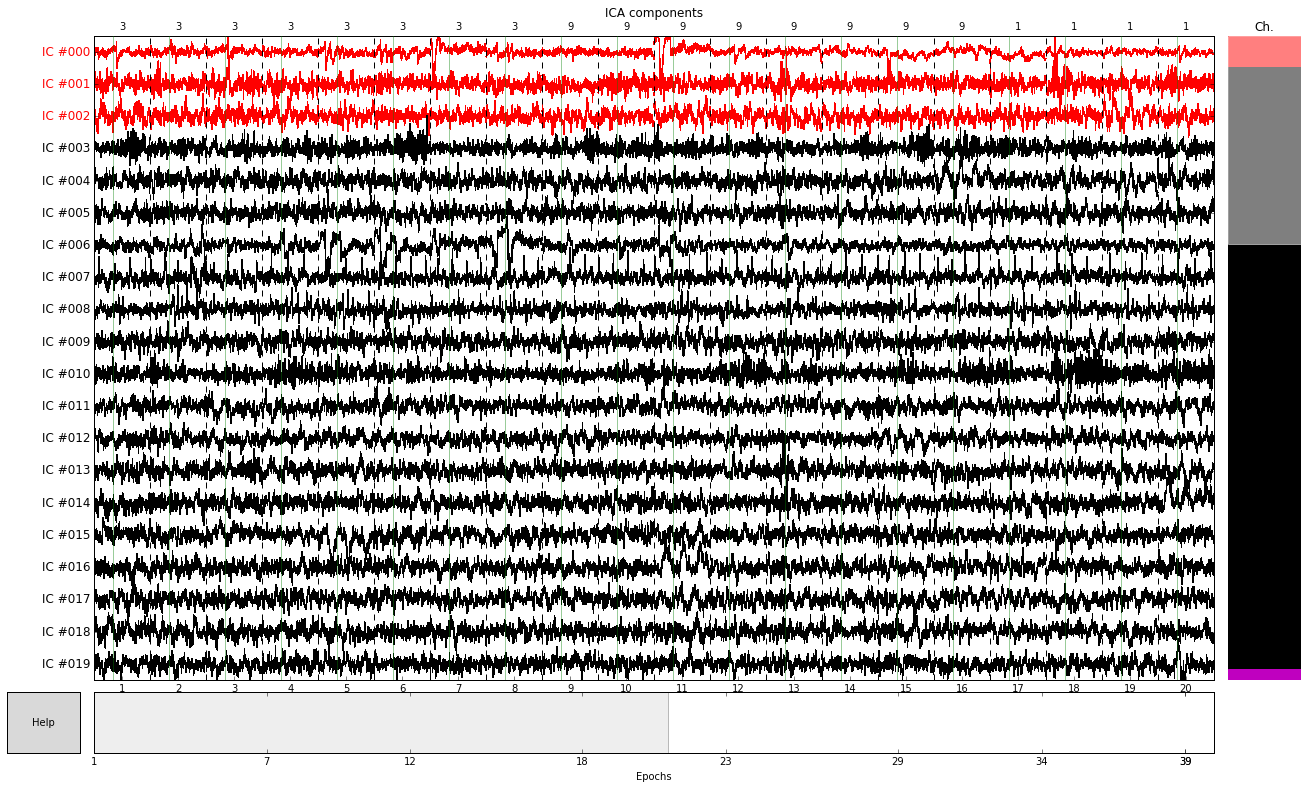

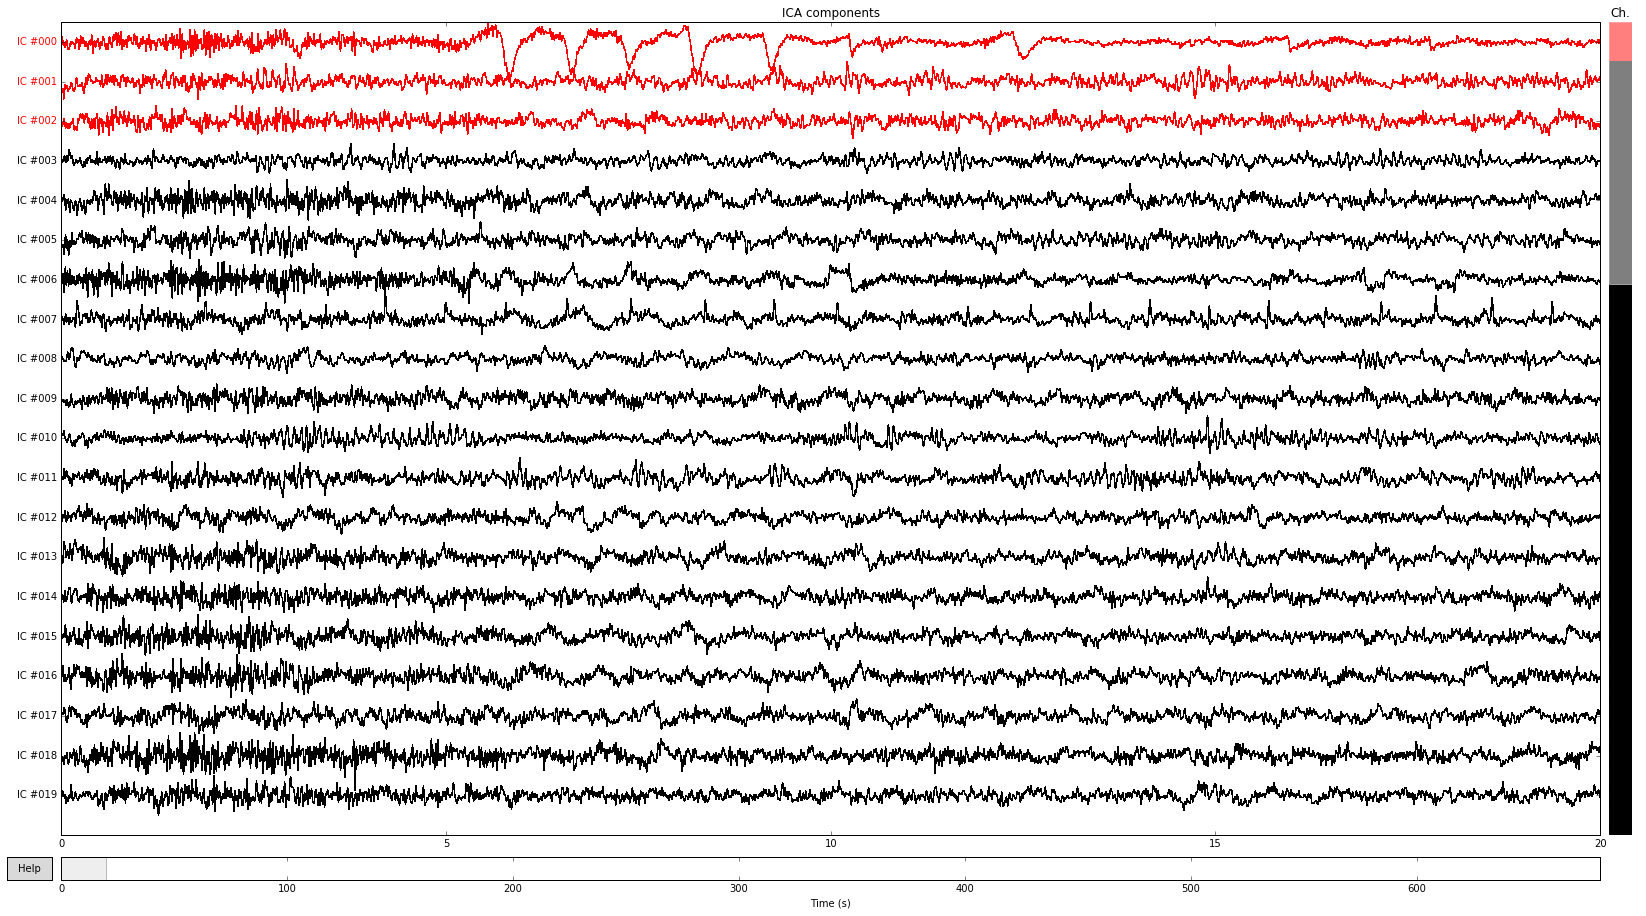

In [22]:

ica.plot_sources(epochs)
plt.figure()
ica.plot_sources(data)
plt.show()